# Football Events
The dataset provides a granular view of 9,074 games, totaling 941,009 events from the biggest 5 European football (soccer) leagues: England, Spain, Germany, Italy, France from 2011/2012 season to 2016/2017 season as of 25.01.2017.

The dataset is organized in 2 files:
•	events.csv contains event data about each game. Text commentary was scraped from: bbc.com, espn.com and onefootball.com
•	ginf.csv - contains metadata and market odds about each game. odds were collected from oddsportal.com.

The aim of the project is to predict whether a goal will occur or not based on several events or conditions...which are:
•	Location of the ball on the field.
•	Bodypart that used to shot the ball.
•	Assist method that resulted a goal.
•	Whether if it was a Corner, Free kick , Open play..
•	Shot place



## Importing libraries and datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import  roc_auc_score, confusion_matrix, roc_curve,f1_score,accuracy_score
from sklearn.model_selection import train_test_split,learning_curve,validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier



In [2]:
df = pd.read_csv("events.csv")
info = pd.read_csv('ginf.csv')
dictionary= pd.read_csv('dict.csv') # I made this csv from the .txt file given.

In [3]:
df.head(20)

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,...,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
0,UFot0hit/,UFot0hit1,1,2,Attempt missed. Mladen Petric (Hamburg) left f...,1,12.0,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,6.0,2.0,0,9.0,2.0,1,1.0,0
1,UFot0hit/,UFot0hit2,2,4,"Corner, Borussia Dortmund. Conceded by Dennis...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
2,UFot0hit/,UFot0hit3,3,4,"Corner, Borussia Dortmund. Conceded by Heiko ...",2,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
3,UFot0hit/,UFot0hit4,4,7,Foul by Sven Bender (Borussia Dortmund).,3,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
4,UFot0hit/,UFot0hit5,5,7,Gokhan Tore (Hamburg) wins a free kick in the ...,8,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
5,UFot0hit/,UFot0hit6,6,9,Hand ball by Jose Paolo Guerrero (Hamburg).,10,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
6,UFot0hit/,UFot0hit7,7,10,"Corner, Hamburg. Conceded by Lukasz Piszczek.",2,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
7,UFot0hit/,UFot0hit8,8,11,Chris Lowe (Borussia Dortmund) wins a free kic...,8,NaN,1,Borussia Dortmund,Hamburg SV,...,NaN,NaN,NaN,NaN,0,2.0,NaN,0,NaN,0
8,UFot0hit/,UFot0hit9,9,11,Foul by Gojko Kacar (Hamburg).,3,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0
9,UFot0hit/,UFot0hit10,10,13,Foul by Gokhan Tore (Hamburg).,3,NaN,2,Hamburg SV,Borussia Dortmund,...,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,0


In [4]:
info.head(10)

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN
5,lOpzwMkp/,/soccer/germany/bundesliga-2011-2012/hertha-be...,True,2011-08-06,D1,2012,germany,Hertha Berlin,Nurnberg,0,1,2.06,3.75,3.95,NaN,NaN,NaN,NaN
6,M7PhlM2C/,/soccer/france/ligue-1-2011-2012/brest-evian-t...,True,2011-08-06,F1,2012,france,Brest,Evian Thonon Gaillard,2,2,2.29,3.25,3.85,NaN,NaN,NaN,NaN
7,QuWqjrYa/,/soccer/france/ligue-1-2011-2012/ac-ajaccio-to...,True,2011-08-06,F1,2012,france,AC Ajaccio,Toulouse,0,2,2.80,3.10,3.05,NaN,NaN,NaN,NaN
8,UBZQ4smg/,/soccer/france/ligue-1-2011-2012/nice-lyon-UBZ...,True,2011-08-06,F1,2012,france,Nice,Lyon,1,3,4.50,3.55,2.00,NaN,NaN,NaN,NaN
9,Wn69eU5B/,/soccer/germany/bundesliga-2011-2012/koln-wolf...,True,2011-08-06,D1,2012,germany,FC Cologne,VfL Wolfsburg,0,3,3.00,3.80,2.54,NaN,NaN,NaN,NaN


## DataFrames merging
df and info will be merged in one DataFrame...

In [5]:
df = df.merge(info[['id_odsp', 'country', 'date','ht','at','league','fthg','ftag']], on='id_odsp', how='left')

## Exploratory data analysis

In [6]:
goals = df[df['is_goal'] == 1]
team_group = goals.groupby(['event_team'])['is_goal'].sum(
).reset_index().sort_values(by='is_goal', ascending=False)
player_group = goals.groupby(['event_team', 'player'])['is_goal'].sum(
).reset_index().sort_values(by='is_goal', ascending=False)

player_group

,event_team,player,is_goal
508,Barcelona,lionel messi,205
3529,Real Madrid,cristiano ronaldo,197
3341,Paris Saint-Germain,zlatan ibrahimovic,111
2594,Lyon,alexandre lacazette,88
3547,Real Madrid,karim benzema,85
...,...,...,...
769,Borussia Dortmund,georg niedermeier,1
767,Borussia Dortmund,felipe,1
2890,Marseille,romain danze,1
2891,Marseille,romaric,1


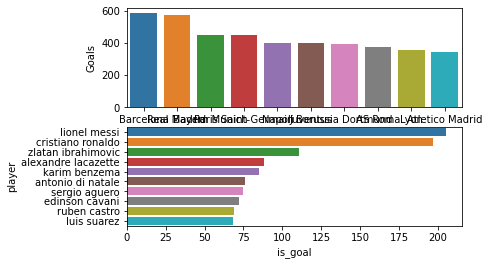

In [7]:
plt.rcParams["figure.figsize"] = (15, 8)
fig, ax = plt.subplots(2, 1)
sns.barplot(data=team_group.iloc[:10], x='event_team',
            y='is_goal', ax=ax[0], ci=None)
ax[0].set_ylabel('Goals')
ax[0].set_xlabel('Team')

sns.barplot(data=player_group.iloc[:10], x='is_goal',
            y='player', ax=ax[1])
ax[0].set_ylabel('Goals')
ax[0].set_xlabel('Player')
plt.show()

In [8]:
shot_places = {1: 'Bit too high', 2: 'Blocked', 3: 'Bottom left corner', 4: 'Bottom right corner', 5: 'Centre of the goal', 6: 'High and wide', 7: 'Hits the bar',
               8: 'Misses to the left', 9: 'Misses to the right', 10: 'Too high', 11: 'Top centre of the goal', 12: 'Top left corner', 13: 'Top right corner'}
goal_location = goals.groupby(['shot_place'])['is_goal'].count(
).reset_index().sort_values(by='is_goal', ascending=False)
goal_location['Percentage'] = round(
    goal_location['is_goal']/goal_location['is_goal'].sum() * 100, 2)
goal_location['shot_place'] = goal_location['shot_place'].map(shot_places)
goal_location

,shot_place,is_goal,Percentage
0,Bottom left corner,7212,31.67
1,Bottom right corner,6932,30.44
2,Centre of the goal,4446,19.53
4,Top right corner,2157,9.47
3,Top left corner,2023,8.88


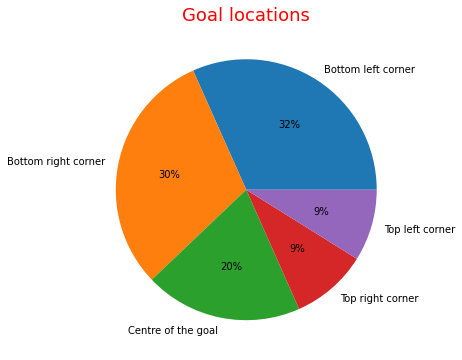

In [9]:
plt.rcParams["figure.figsize"] = (10, 6)
plt.pie(goal_location['is_goal'], labels=goal_location['shot_place'],
        normalize=True, autopct='%.0f%%')

plt.title('Goal locations', fontdict={'size': 18, 'color': 'r'})
plt.show()

In [10]:
locations = {1: 'Attacking half', 2: 'Defensive half', 3: 'Centre of the box', 4: 'Left wing', 5: 'Right wing', 6: 'Difficult angle and long range', 7: 'Difficult angle on the left', 8: 'Difficult angle on the right', 9: 'Left side of the box',
             10: 'Left side of the six yard box', 11: 'Right side of the box', 12: 'Right side of the six yard box', 13: 'Very close range', 14: 'Penalty spot', 15: 'Outside the box', 16: 'Long range', 17: 'More than 35 yards', 18: 'More than 40 yards', 19: 'Not recorded'}

shot_location = df.groupby(['location'])['is_goal'].sum(
).reset_index().sort_values(by='is_goal', ascending=False)

shot_location['location'] = shot_location['location'].map(locations)
shot_location.reset_index()

,index,location,is_goal
0,2,Centre of the box,10713
1,12,Very close range,3337
2,14,Outside the box,2555
3,13,Penalty spot,1989
4,18,Not recorded,1438
5,10,Right side of the box,1273
6,8,Left side of the box,1234
7,9,Left side of the six yard box,711
8,11,Right side of the six yard box,702
9,6,Difficult angle on the left,201


In [11]:
box=shot_location.iloc[[3,5,6,7,8]]
box

,location,is_goal
13,Penalty spot,1989
10,Right side of the box,1273
8,Left side of the box,1234
9,Left side of the six yard box,711
11,Right side of the six yard box,702


### Goal locations

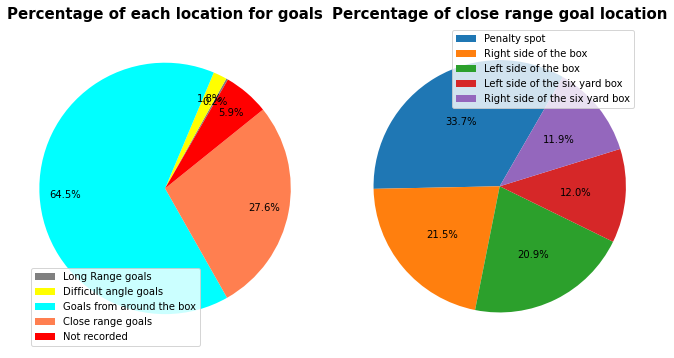

In [12]:
fig, ax = plt.subplots(1, 2)


diff_angle_goals = sum(goals["location"] == 6) + \
    sum(goals["location"] == 7)+sum(goals["location"] == 8)
long_range_goals = sum(goals["location"] == 16) + \
    sum(goals["location"] == 17)+sum(goals["location"] == 18)
box_goals = sum(goals["location"] == 3)+sum(goals["location"] == 9) + \
    sum(goals["location"] == 11)+sum(goals["location"] == 15)
close_range_goals = sum(goals["location"] == 10)+sum(goals["location"]
                                                     == 12)+sum(goals["location"] == 13, sum(goals["location"] == 14))
not_recorded = sum(goals["location"] == 19)

labels = ["Long Range goals", "Difficult angle goals",
          "Goals from around the box", "Close range goals", "Not recorded"]
sizes = [long_range_goals, diff_angle_goals,
         box_goals, close_range_goals, not_recorded]
colors = ["gray", "yellow", "aqua", "coral", "red"]

ax[0].pie(sizes, colors=colors, autopct='%1.1f%%',
          startangle=60, pctdistance=0.8)
ax[0].legend(labels)
ax[0].axis('equal')
ax[0].set_title("Percentage of each location for goals",
                fontsize=15, fontweight="bold")

ax[1].pie(box['is_goal'],
          normalize=True, autopct='%1.1f%%', startangle=60)
ax[1].set_title("Percentage of close range goal location",
                fontsize=15, fontweight="bold")
ax[1].legend(box['location'])
ax[1].axis('equal')

fig.set_size_inches(11, 6)
plt.show()

The pie graphs displays:

- The majority of goals are attempted from around the box (64.5%) and close range (19.4%).

- From the close range goals we can see that the penalty spot has the highest percentage(33.7%).

### Goals against time

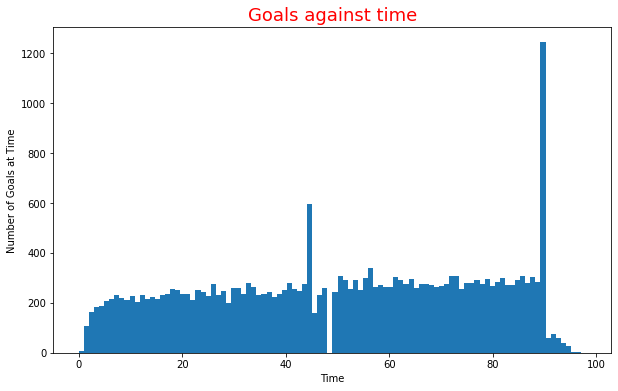

In [13]:
plt.hist(goals['time'], 100)
plt.xlabel("Time")
plt.ylabel("Number of Goals at Time")
plt.title("Goals against time", fontdict={'size': 18, 'color': 'r'})
plt.show()

The plot above shows:
-  Most goals are scored around the **Half-Time (45mins + extra time)** and around **Full-Time (90mins + extra time)**


### Analysing Home/Away goals

Text(0.5, 1.0, 'Number of goals (by home/away side) against Time during match')

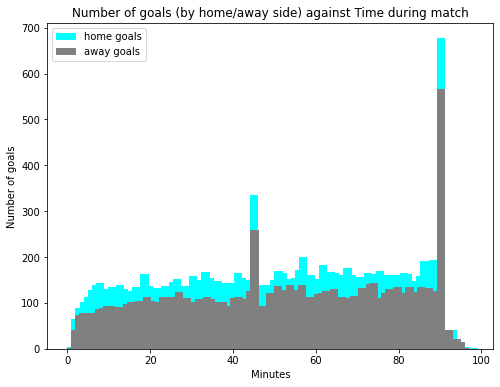

In [14]:
fig = plt.figure(figsize=(8, 6))
plt.hist(goals[goals["side"] == 1]["time"], width=2,
         bins=100, color="cyan", label="home goals")
plt.hist(goals[goals["side"] == 2]["time"], width=2,
         bins=100, color="grey", label="away goals")
plt.xlabel("Minutes")
plt.ylabel("Number of goals")
plt.legend()
plt.title("Number of goals (by home/away side) against Time during match")

The plot above shows:
-  For every minute, most of the goals scored are by the **home side**

This supports the general notion that the home side has a statistical advantage.

### Analysing HOW and WHERE goals are scored

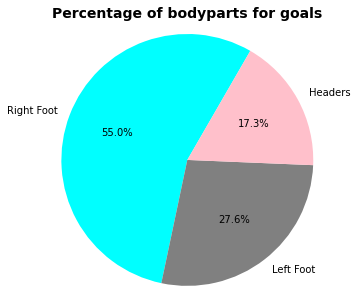

In [15]:
labels = ["Right Foot", "Left Foot", "Headers"]
sizes = [goals[goals["bodypart"] == 1].shape[0], goals[goals["bodypart"]== 2].shape[0], goals[goals["bodypart"] == 3].shape[0]]
colors = ["cyan", "grey", "pink"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=60)
plt.axis('equal')
plt.title("Percentage of bodyparts for goals", fontsize=14, fontweight="bold")
fig = plt.gcf()
fig.set_size_inches(5, 5)

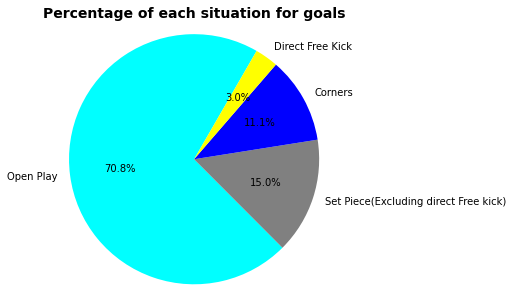

In [16]:
labels=["Open Play", "Set Piece(Excluding direct Free kick)","Corners","Direct Free Kick"]
sizes=[goals[goals["situation"]==1].shape[0],goals[goals["situation"]==2].shape[0],goals[goals["situation"]==3].shape[0],goals[goals["situation"]==4].shape[0]]
colors=["cyan","grey","blue","yellow"]
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=60)
plt.axis('equal')
plt.title("Percentage of each situation for goals",fontsize=14,fontweight="bold")
fig=plt.gcf()
fig.set_size_inches(5,5)

-  The plots depict:

Approximately 70.8% of goals are scored in **open play**.

Text(0.5, 1.0, 'Number of Red cards (Home/Away)')

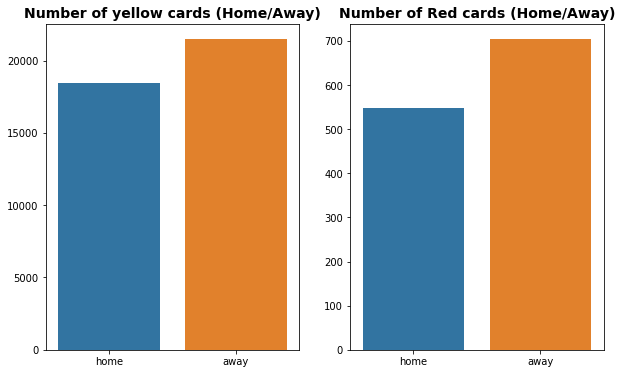

In [17]:
fig, ax = plt.subplots(1, 2)
#yellow cards
yel_card = df[df["event_type"]==4]
yel_home=yel_card[yel_card["side"]==1].shape[0]
yel_away=yel_card[yel_card["side"]==2].shape[0]

yel_combi =pd.DataFrame({"home":yel_home,"away":yel_away},index=["Yellow cards"])

plt.title("Number of yellow cards (Home/Away)",fontsize=14,fontweight="bold")
sns.barplot(data=yel_combi, ax=ax[0])
ax[0].set_title("Number of yellow cards (Home/Away)",fontsize=14,fontweight="bold")


# Red cards
red=df[df["event_type"]==6]
sec_yellow=df[df["event_type"]==5]
reds=[sec_yellow,red]
red_cards=pd.concat(reds)
red_cards.event_type.unique()
red_home=red_cards[red_cards["side"]==1].shape[0]
red_away=red_cards[red_cards["side"]==2].shape[0]

red_combi=pd.DataFrame({"home":red_home,"away":red_away},index=["Red cards"])
sns.barplot(data=red_combi, ax=ax[1])
ax[1].set_title("Number of Red cards (Home/Away)",fontsize=14,fontweight="bold")



The away team has received more yellow & red cards than the home team.


## Data Cleaning

In [18]:
df.isna().sum()

id_odsp               0
id_event              0
sort_order            0
time                  0
text                  0
event_type            0
event_type2      726716
side                  0
event_team            0
opponent              0
player            61000
player2          649699
player_in        889294
player_out       889271
shot_place       713550
shot_outcome     712511
is_goal               0
location         473942
bodypart         711824
assist_method         0
situation        711872
fast_break            0
country               0
date                  0
ht                    0
at                    0
league                0
fthg                  0
ftag                  0
dtype: int64

In [19]:
df_cleaned = df[['location', 'bodypart','assist_method','situation','time','player','side','shot_place','is_goal','event_type']].copy()
df_cleaned.dropna(how='all') # this will remove rows will all null values
df_cleaned.dropna(subset=['player', 'shot_place'], inplace=True)

In [20]:
df_cleaned.isnull().sum()

location         0
bodypart         0
assist_method    0
situation        0
time             0
player           0
side             0
shot_place       0
is_goal          0
event_type       0
dtype: int64

In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227451 entries, 0 to 941006
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location       227451 non-null  float64
 1   bodypart       227451 non-null  float64
 2   assist_method  227451 non-null  int64  
 3   situation      227451 non-null  float64
 4   time           227451 non-null  int64  
 5   player         227451 non-null  object 
 6   side           227451 non-null  int64  
 7   shot_place     227451 non-null  float64
 8   is_goal        227451 non-null  int64  
 9   event_type     227451 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 19.1+ MB


Now feature and response columns are clean..

## Model selection & Building
### Defining Features and respond


In [22]:
x = df_cleaned[['time','location', 'bodypart', 'assist_method', 'situation','side','shot_place']]
y=df_cleaned['is_goal']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)


In [23]:
dictionary[['locations', 'bodyparts', 'assist_methods', 'situations','sides','shot_places']]

,locations,bodyparts,assist_methods,situations,sides,shot_places
0,Attacking half,right foot,Pass,Open play,Home,Bit too high
1,Defensive half,left foot,Cross,Set piece,Away,Blocked
2,Centre of the box,head,Headed pass,Corner,NaN,Bottom left corner
3,Left wing,NaN,Through ball,Free kick,NaN,Bottom right corner
4,Right wing,NaN,NaN,NaN,NaN,Centre of the goal
5,Difficult angle and long range,NaN,NaN,NaN,NaN,High and wide
6,Difficult angle on the left,NaN,NaN,NaN,NaN,Hits the bar
7,Difficult angle on the right,NaN,NaN,NaN,NaN,Misses to the left
8,Left side of the box,NaN,NaN,NaN,NaN,Misses to the right
9,Left side of the six yard box,NaN,NaN,NaN,NaN,Too high


### Encoding
One-hot Enconding was used by get_dummies() method..

In [24]:

x_train = pd.get_dummies(x_train, columns=[
                   'location', 'bodypart', 'assist_method', 'situation','side','shot_place'], drop_first=True)
x_test = pd.get_dummies(x_test, columns=[
                   'location', 'bodypart', 'assist_method', 'situation','side','shot_place'], drop_first=True)

y=df_cleaned['is_goal']


 The following codes are for Evaluation scores and ROC curve plotting...

In [25]:
def model_scores(model, y_true, y_pred):
    '''
    Takes y_test,y_predict, calculates:
    Accuracy,AUC ,f1 score and confusion matrix
    :param model:
    :param y_true:
    :param y_pred:
    :return:
    scores :dict containing scores
    '''
    accuracy = round(accuracy_score(y_true, y_pred), 3)
    f1 = round(f1_score(y_true,y_pred),3)
    confusion = confusion_matrix(y_true, y_pred)
    auc = round(roc_auc_score(y_true, y_pred), 3)
    name = str(model)
    acc = round((confusion[0, 0]+confusion[1, 1]) /
                sum([np.sum(i) for i in confusion]) * 100, 2)
    scores={'Model':name,'Accuracy':acc,'f1 score':f1,'AUC score':auc}
    print('{} scores are: \nAccuracy: {}\nAUC: {}\nf1: {}\nAnd the confusion matrix is:\n {}\n '.format(
        str(name), accuracy, auc,f1, confusion))
    print('{} predicted {} True positives (actual goals) and {} True negatives (not goals).\nAnd a total of {} False positives & negatives.'.format(
        name, confusion[0, 0], confusion[1, 1], confusion[0, 1]+confusion[1, 0]))
    print('It means {}% of times the model predicted a shot result correctly.'.format(
        round(accuracy*100, 2)))
    print(f'{"-"*30}')
    return scores


def roc_curve_plot(model, x_test, y_test):
    y_pred_proba = model.predict_proba(x_test)[:, 1]
    FP, TP, TH = roc_curve(y_test, y_pred_proba)
    plt.subplots(1, figsize=(5, 4))
    plt.title('ROC - {}'.format(model))
    plt.plot(FP, TP)
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


### Logistic Regression

In [26]:
lr= LogisticRegression(n_jobs=-1)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [27]:
lr_score=model_scores(lr,y_test,y_pred_lr)

LogisticRegression(n_jobs=-1) scores are: 
Accuracy: 0.935
AUC: 0.766
f1: 0.628
And the confusion matrix is:
 [[60083  1434]
 [ 2985  3734]]
 
LogisticRegression(n_jobs=-1) predicted 60083 True positives (actual goals) and 3734 True negatives (not goals).
And a total of 4419 False positives & negatives.
It means 93.5% of times the model predicted a shot result correctly.
------------------------------


### Decision-Tree classifier

In [28]:
dt = DecisionTreeClassifier()
%time dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

Wall time: 421 ms


In [29]:
dt_score=model_scores(dt,y_test,y_pred_dt)

DecisionTreeClassifier() scores are: 
Accuracy: 0.922
AUC: 0.742
f1: 0.566
And the confusion matrix is:
 [[59421  2096]
 [ 3239  3480]]
 
DecisionTreeClassifier() predicted 59421 True positives (actual goals) and 3480 True negatives (not goals).
And a total of 5335 False positives & negatives.
It means 92.2% of times the model predicted a shot result correctly.
------------------------------


### Random Forest

In [30]:
rf = RandomForestClassifier(n_jobs=-1, random_state=1)
%time  rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

Wall time: 4.02 s


In [31]:
rf_score =model_scores(rf,y_test,y_pred_rf)

RandomForestClassifier(n_jobs=-1, random_state=1) scores are: 
Accuracy: 0.924
AUC: 0.761
f1: 0.59
And the confusion matrix is:
 [[59267  2250]
 [ 2967  3752]]
 
RandomForestClassifier(n_jobs=-1, random_state=1) predicted 59267 True positives (actual goals) and 3752 True negatives (not goals).
And a total of 5217 False positives & negatives.
It means 92.4% of times the model predicted a shot result correctly.
------------------------------


### Gradient Boosting

In [32]:
gbc = GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=1)
%time gbc.fit(x_train, y_train)
y_pred_gbc = gbc.predict(x_test)

Wall time: 51.2 s


In [33]:
gbc_score=model_scores(gbc, y_test, y_pred_gbc)

GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=1) scores are: 
Accuracy: 0.936
AUC: 0.781
f1: 0.645
And the confusion matrix is:
 [[59952  1565]
 [ 2773  3946]]
 
GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=1) predicted 59952 True positives (actual goals) and 3946 True negatives (not goals).
And a total of 4338 False positives & negatives.
It means 93.6% of times the model predicted a shot result correctly.
------------------------------


In [34]:
scores_comparison = pd.DataFrame(data=[lr_score,dt_score,rf_score,gbc_score])
scores_comparison.sort_values(by='AUC score',ascending=False)

,Model,Accuracy,f1 score,AUC score
3,"GradientBoostingClassifier(max_depth=5, n_esti...",93.64,0.645,0.781
0,LogisticRegression(n_jobs=-1),93.52,0.628,0.766
2,"RandomForestClassifier(n_jobs=-1, random_state=1)",92.35,0.590,0.761
1,DecisionTreeClassifier(),92.18,0.566,0.742


## Model evaluation
### ROC curve

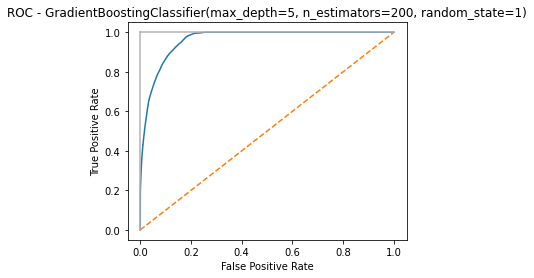

In [35]:
roc_curve_plot(gbc, x_test, y_test)

In [36]:
x1 = pd.get_dummies(x, columns=[
                   'location', 'bodypart', 'assist_method', 'situation','side','shot_place'], drop_first=True)

### Learning curve:

Wall time: 19min 7s


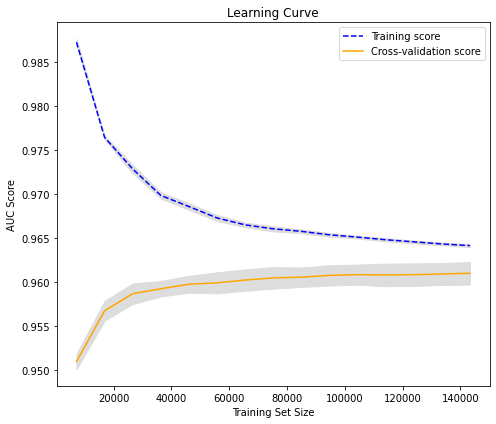

In [37]:
%time train_sizes, train_scores, test_scores = learning_curve(gbc, x_train, y_train, cv=10, scoring='roc_auc', n_jobs=-1, train_sizes=np.linspace(0.05, 1, 15))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(7, 6))
plt.plot(train_sizes, train_mean, '--',
         color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="orange",
         label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel(
    "AUC Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

**The model accuracy steadies around 0.96 with training set size = 80000**

## Parameter Tuning
Here I'm trying to find the best parameters for gradiant boosting model

In [38]:
param_range = np.arange(10, 300, 10)

%time train_scores, test_scores = validation_curve(GradientBoostingClassifier(max_depth=5),x1, y, param_name="n_estimators", param_range=param_range,cv=4, scoring="accuracy",n_jobs=-1)

Wall time: 29min 40s


In [39]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

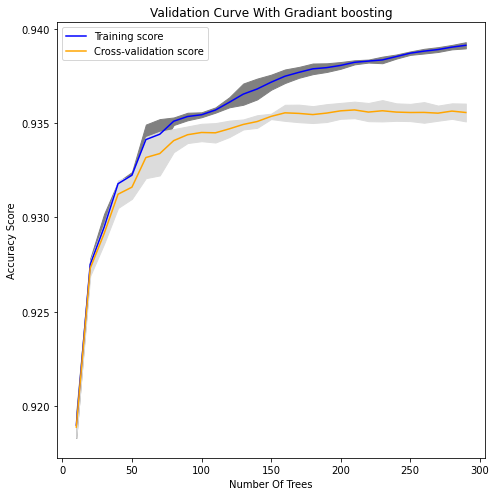

In [40]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="orange")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

plt.title("Validation Curve With Gradiant boosting")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

We can see that the best n_estimator is 200... now we use it in our model.

In [41]:
#To supress warnings in the output
import warnings
warnings.filterwarnings('ignore')

## Feature importance

In [42]:
import eli5
eli5.explain_weights(gbc, feature_names=list(x_train.columns))

Weight,Feature
0.1805 ± 0.1168,shot_place_4.0
0.1726 ± 0.1157,shot_place_3.0
0.0873 ± 0.0820,location_15.0
0.0771 ± 0.1257,shot_place_5.0
0.0665 ± 0.0831,shot_place_12.0
0.0645 ± 0.0859,shot_place_13.0
0.0622 ± 0.1160,situation_3.0
0.0545 ± 0.0923,location_13.0
0.0541 ± 0.0854,situation_2.0
0.0362 ± 0.0891,location_19.0


- shot place got the highest feature importance..

- Location is second most importance variable.

## Data Balance
Check for imbalance data...

In [43]:
scored = df_cleaned[df_cleaned['is_goal'] == 1]['is_goal'].sum()
all_shots = df_cleaned.shape[0]
percent = round(scored/all_shots * 100, 2)
print('The total shots of the dataset were {} . While goals were {}'.format(
    all_shots, scored))
print('And that makes {}% of the shots where goals.'.format(percent))

The total shots of the dataset were 227451 . While goals were 22770
And that makes 10.01% of the shots where goals.


In [44]:
new_train=pd.concat([df_cleaned[(df_cleaned.is_goal==0)&(df_cleaned.event_type==1)].sample(n=50000),df_cleaned[df_cleaned.is_goal==1]])

In [45]:
scored = new_train[new_train['is_goal'] == 1]['is_goal'].sum()
all_shots = new_train.shape[0]
percent = round(scored/all_shots * 100, 2)
print('The total shots of the dataset were {} . While goals were {}'.format(
    all_shots, scored))
print('And that makes {}% of the shots where goals.'.format(percent))

The total shots of the dataset were 72770 . While goals were 22770
And that makes 31.29% of the shots where goals.


now its better... lets see the result..

In [46]:
x_b = new_train[['time','location', 'bodypart', 'assist_method', 'situation','side','shot_place']]
y_b=new_train['is_goal']
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(x_b,y_b,test_size=0.2,random_state=1)

In [47]:
x_train_b = pd.get_dummies(x_train_b, columns=[
                   'location', 'bodypart', 'assist_method', 'situation','side','shot_place'], drop_first=True)
x_test_b = pd.get_dummies(x_test_b, columns=[
                   'location', 'bodypart', 'assist_method', 'situation','side','shot_place'], drop_first=True)


A function for quick score comparison...

In [48]:
def test_all_models(x_test,x_train,y_test,y_train):
    '''
    Takes x_test,x_train,y_test,y_train, fits and predict by :
    Logistic regression,Decision tree ,Random forest,Gradient boosting.
    
    :return:
    DataFrame with scores of each model
    '''
    lr=LogisticRegression(n_jobs=-1)
    dt=DecisionTreeClassifier(random_state=1)
    rf = RandomForestClassifier(n_jobs=-1, random_state=1)
    gbc = GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=1)
    models=[lr,dt,rf,gbc]
    scores_comp=[]
    for i in models:
        i.fit(x_train,y_train)
        y_pred=i.predict(x_test)
        scores=model_scores(i,y_test,y_pred)
        scores_comp.append(scores)
    scores_df= pd.DataFrame(scores_comp).sort_values(by='AUC score',ascending=False)
    return scores_df

### Original dataset scores...

In [49]:
test_all_models(x_test, x_train, y_test, y_train)

LogisticRegression(n_jobs=-1) scores are: 
Accuracy: 0.935
AUC: 0.766
f1: 0.628
And the confusion matrix is:
 [[60083  1434]
 [ 2985  3734]]
 
LogisticRegression(n_jobs=-1) predicted 60083 True positives (actual goals) and 3734 True negatives (not goals).
And a total of 4419 False positives & negatives.
It means 93.5% of times the model predicted a shot result correctly.
------------------------------
DecisionTreeClassifier(random_state=1) scores are: 
Accuracy: 0.922
AUC: 0.741
f1: 0.565
And the confusion matrix is:
 [[59420  2097]
 [ 3246  3473]]
 
DecisionTreeClassifier(random_state=1) predicted 59420 True positives (actual goals) and 3473 True negatives (not goals).
And a total of 5343 False positives & negatives.
It means 92.2% of times the model predicted a shot result correctly.
------------------------------
RandomForestClassifier(n_jobs=-1, random_state=1) scores are: 
Accuracy: 0.924
AUC: 0.761
f1: 0.59
And the confusion matrix is:
 [[59267  2250]
 [ 2967  3752]]
 
RandomFore

,Model,Accuracy,f1 score,AUC score
3,"GradientBoostingClassifier(max_depth=5, n_esti...",93.64,0.645,0.781
0,LogisticRegression(n_jobs=-1),93.52,0.628,0.766
2,"RandomForestClassifier(n_jobs=-1, random_state=1)",92.35,0.590,0.761
1,DecisionTreeClassifier(random_state=1),92.17,0.565,0.741


### Balanced dataset scores...

In [50]:
test_all_models(x_test_b, x_train_b, y_test_b, y_train_b)

LogisticRegression(n_jobs=-1) scores are: 
Accuracy: 0.882
AUC: 0.87
f1: 0.815
And the confusion matrix is:
 [[9060  970]
 [ 743 3781]]
 
LogisticRegression(n_jobs=-1) predicted 9060 True positives (actual goals) and 3781 True negatives (not goals).
And a total of 1713 False positives & negatives.
It means 88.2% of times the model predicted a shot result correctly.
------------------------------
DecisionTreeClassifier(random_state=1) scores are: 
Accuracy: 0.86
AUC: 0.831
f1: 0.769
And the confusion matrix is:
 [[9100  930]
 [1114 3410]]
 
DecisionTreeClassifier(random_state=1) predicted 9100 True positives (actual goals) and 3410 True negatives (not goals).
And a total of 2044 False positives & negatives.
It means 86.0% of times the model predicted a shot result correctly.
------------------------------
RandomForestClassifier(n_jobs=-1, random_state=1) scores are: 
Accuracy: 0.868
AUC: 0.849
f1: 0.79
And the confusion matrix is:
 [[9014 1016]
 [ 909 3615]]
 
RandomForestClassifier(n_j

,Model,Accuracy,f1 score,AUC score
3,"GradientBoostingClassifier(max_depth=5, n_esti...",88.74,0.824,0.877
0,LogisticRegression(n_jobs=-1),88.23,0.815,0.870
2,"RandomForestClassifier(n_jobs=-1, random_state=1)",86.77,0.790,0.849
1,DecisionTreeClassifier(random_state=1),85.96,0.769,0.831


So the more Balanced dataset resulted a higher accuracy..
**0.88 AUC score** is quite good improvement (around **12%** increase in AUC score)...
Lets evaluate more ...

## Balanced data evaluation
### ROC curve

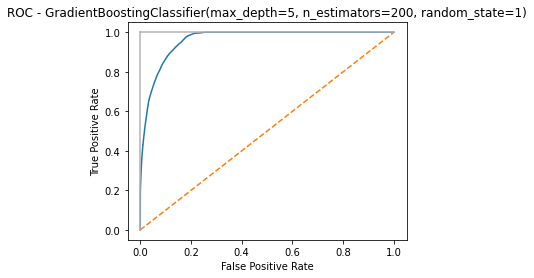

In [51]:
roc_curve_plot(gbc, x_test, y_test)

### Learning curve

Wall time: 3min 31s


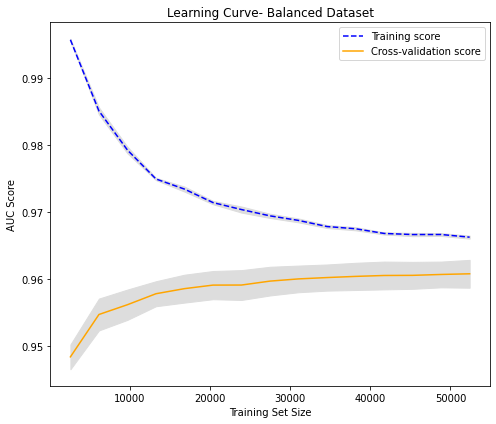

In [52]:
%time train_sizes, train_scores, test_scores = learning_curve(gbc, x_train_b, y_train_b, cv=10, scoring='roc_auc', n_jobs=-1, train_sizes=np.linspace(0.05, 1, 15))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(7, 6))
plt.plot(train_sizes, train_mean, '--',
         color="blue",  label="Training score")
plt.plot(train_sizes, test_mean, color="orange",
         label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve- Balanced Dataset")
plt.xlabel("Training Set Size"), plt.ylabel(
    "AUC Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Results
- Gradient Boosting were selected as it made a highly accurate (88%) model for goal prediction.

- Balancing the dataset resulted in 12% increase in accuracy.

- Shot place has the highest effect on goal prediction.

## Recommendations & Future ideas:

- Next, adding Player or the team as a feature. Before adding them a performance index or a weighting factor should be calculated first.

- Try using other models or apply hyperparameter tuning to all models as it may change the accuracy for some models and for some not.

- Adding the goal keeper (his performance)as a feature.